In [1]:
from S1_generator.S1_event_generator import S1_event
from CWT_peak_identifier import peak_identifier
from Threshold_cross102 import peak_threshold_finder2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
y,n,p = S1_event(5)

peak_identifier(y)


In [ ]:
peak_threshold_finder2(y)


In [8]:
count= np.zeros((15,1000,3))
for i in range(15):
    for j in range(1000):
        y,n,p = S1_event(i+1)

        n1= peak_identifier(y)[0]
        n2= peak_threshold_finder2(y)[0]
        count[i,j,0]=n
        count[i,j,1]=n1
        count[i,j,2]=n2

efficiency = np.zeros((15,4))
for i in range(15):
    efficiency[i,0]=100*np.mean(count[i,:,1])/(i+1)
    efficiency[i,1]=100*np.std(count[i,:,1])/(i+1)
    efficiency[i,2]=100*np.mean(count[i,:,2])/(i+1)
    efficiency[i,3]=100*np.std(count[i,:,2])/(i+1)

<ErrorbarContainer object of 3 artists>

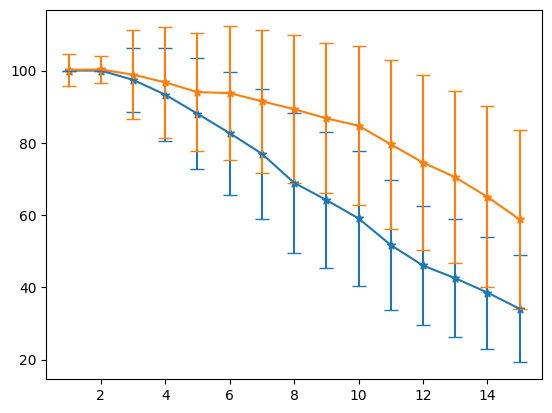

In [22]:
import matplotlib.pyplot as plt
x=np.arange(1,16,1)
plt.figure()
plt.scatter(x,efficiency[:,0],marker='*')
plt.errorbar(x,efficiency[:,0],yerr=efficiency[:,1],capsize=5.0)
plt.scatter(x,efficiency[:,2],marker='*')
plt.errorbar(x,efficiency[:,2],yerr=efficiency[:,3],capsize=5.0)

In [34]:
np.savetxt('/Users/francescostraniero/Documents/Pembroke_4th_year/MPhys_Proj/Conventional_efficiency',efficiency)

In [3]:
CNN_eff= np.loadtxt('/Users/francescostraniero/Documents/Pembroke_4th_year/MPhys_Proj/CNN_efficiency')
efficiency = np.loadtxt('/Users/francescostraniero/Documents/Pembroke_4th_year/MPhys_Proj/Conventional_efficiency')
CNN_eff2 = np.loadtxt('/Users/francescostraniero/Documents/Pembroke_4th_year/MPhys_Proj/CNN_multiple_efficiency.txt')

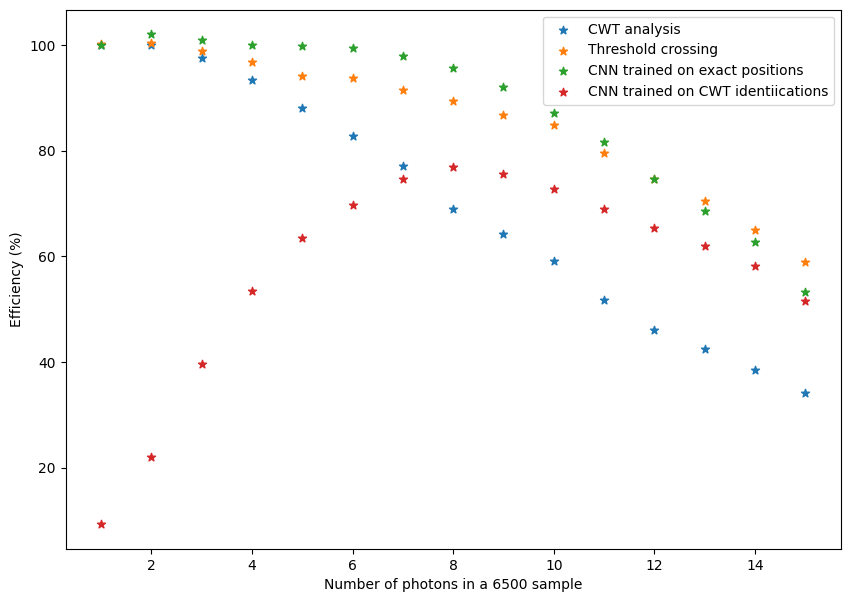

In [7]:

x=np.arange(1,16,1)
plt.figure(figsize=(10,7))
plt.scatter(x,efficiency[:,0],marker='*')
#plt.errorbar(x,efficiency[:,0],yerr=efficiency[:,1],capsize=5.0)
plt.scatter(x,efficiency[:,2],marker='*')
#plt.errorbar(x,efficiency[:,2],yerr=efficiency[:,3],capsize=5.0)

plt.scatter(x,CNN_eff[:,0],marker='*')
plt.scatter(x,CNN_eff[:,2],marker='*')

plt.xlabel('Number of photons in a 6500 sample')
plt.ylabel('Efficiency (%)')
plt.legend(('CWT analysis','Threshold crossing','CNN trained on exact positions','CNN trained on CWT identiications'))

In [5]:
import ROOT

Welcome to JupyROOT 6.28/00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file efficiency_algorithms.png has been created


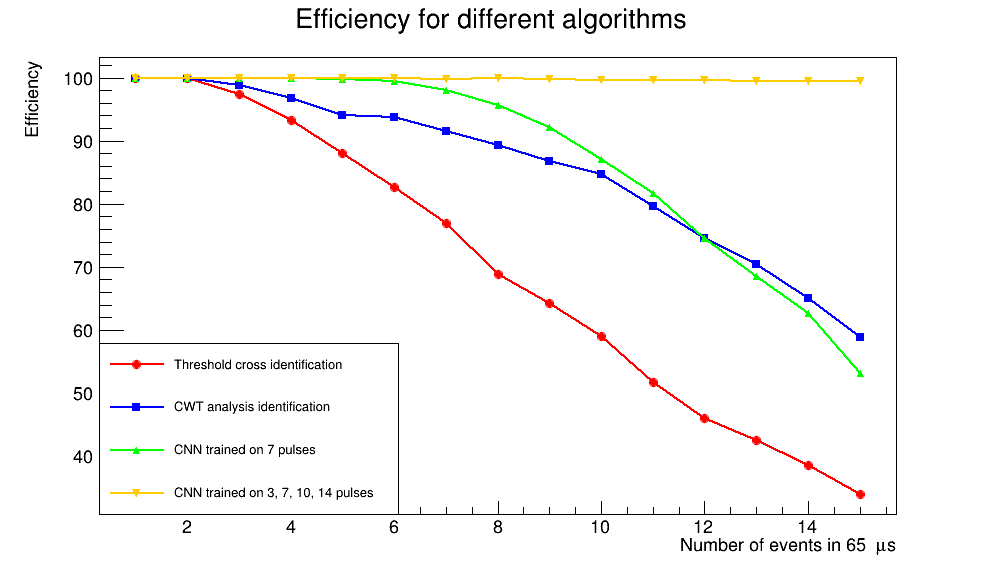

In [16]:


# Example data: 2D array with rows corresponding to the y-values of each line
data = np.array([efficiency[:,0],efficiency[:,2],CNN_eff[:,0],CNN_eff2[:,0]])
data[1,0]=100
data[1,1]=100
data[2,1]=100
data[2,2]=100
# Generate the common x-axis values (e.g., [1, 2, 3, ...])
x_values = np.arange(1, data.shape[1] + 1)

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph with Multiple Lines", 1000, 600)

# Initialize a multigraph to hold multiple graphs
multigraph = ROOT.TMultiGraph()

# Colors for the lines
colors = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen, ROOT.kOrange]

# Loop over each row in the data (each line)
for i, y_values in enumerate(data):
    n_points = len(y_values)  # Number of points in this line
    graph = ROOT.TGraph(n_points)
    for j, y in enumerate(y_values):
        graph.SetPoint(j, x_values[j], y)  # Set x and y values
    
    # Set graph attributes
    graph.SetLineColor(colors[i])
    graph.SetLineWidth(2)
    graph.SetMarkerStyle(20 + i)
    graph.SetMarkerColor(colors[i])
    
    # Add the graph to the multigraph
    multigraph.Add(graph)

# Draw the multigraph
multigraph.SetTitle("Efficiency for different algorithms;Number of events in 65#mus;Efficiency")
multigraph.Draw("ALP")  # A: Draw axis, L: Lines, P: Points

# Draw the legend
legend = ROOT.TLegend(0.1, 0.1, 0.4, 0.4)  # x1, y1, x2, y2
legend.AddEntry(multigraph.GetListOfGraphs().At(0), "Threshold cross identification", "lp")
legend.AddEntry(multigraph.GetListOfGraphs().At(1), "CWT analysis identification", "lp")
legend.AddEntry(multigraph.GetListOfGraphs().At(2), "CNN trained on 7 pulses", "lp")
legend.AddEntry(multigraph.GetListOfGraphs().At(3), "CNN trained on 3, 7, 10, 14 pulses", "lp")

legend.Draw()

# Save the canvas as an image
canvas.SaveAs("efficiency_algorithms.png")
canvas.Draw()

In [29]:
data[1,0]

100.2